# Creating Maps

```{admonition} Summary
:class: hint


```

To visualize the data, the data should be loaded using the `geopandas` package as explained in the previous section. Then use the `plot` function to visualize the data.

Using the `plot` function, without additional customization will produce a basic, static plot of the data with default settings.

In [2]:
import geopandas as gp
from pathlib import Path

INPUT = Path.cwd().parents[0] / "00_data"
gdb_path = INPUT / "Biotopwerte_Dresden_2018.gdb"
gdf = gp.read_file(gdb_path, layer="Biotopwerte_Dresden_2018")

## Plot Selected Features

In [3]:
filter_db = gdf[gdf['Shape_Area'] < 1000]

<Axes: >

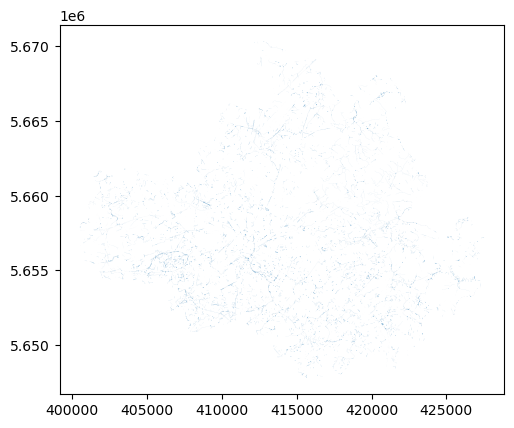

In [4]:
filter_db.plot()

To have a better visualization of the data, some features of the plot can be customized:

- `linewidth`: The thickness of the lines
- `color`: The color of the shapes
- `edgecolor`: The color of the edges of shapes
- `set_title`: Title of plot
- `set_axis_off`: Hides the axis

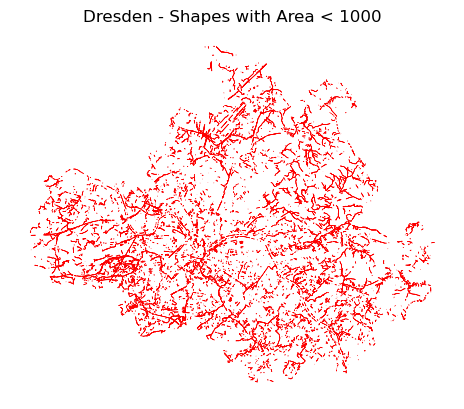

In [5]:
ax = filter_db.plot(linewidth=0.5, edgecolor='red')
ax.set_title("Dresden - Shapes with Area < 1000")
ax.set_axis_off()

For having more control over the figure, it is usually adviced to create a matplotlib figure object ahead of time.

For this reason the package imported.

In [6]:
import matplotlib.pyplot as plt

Then by defining different parameters for figure and subplots the visualization are customized. 

- `Figure (fig)`: The overall canvas containing the subplots
- `Subplot (ax)`: An individual plotting area inside the figure
- `nrows` and `ncols`: The number of the subplots in each row and column of the figure
- `figsize`: The size of the figure in inch
- `dpi`: The resolution of the figure

The `ax` parameter in the `plot` is used to specify in which subplot, the plot should be created.

```{admonition} How **ax** parameter works!
:class: dropdown
In case there is more than one subplot, the `ax` parameter works as the following:

fig, ax = plt.subplots(nrows=2, ncols=3) **#Creating 6 subplots: 2 in rows, 3 in columns**

- ax1 = ax[0, 0]  ->     **#First row, first column**
- ax2 = ax[0, 1]  ->     **#First row, second column**
- ax3 = ax[0, 2]  ->     **#First row, third column**
- ax4 = ax[1, 0]  ->     **#Second row, first column**
- ax5 = ax[1, 1]  ->     **#Second row, second column**
- ax6 = ax[1, 2]  ->     **#Second row, third column**



**Examples**:

- Plot in the First row, third column:

ax3 = filter_db.plot(ax=ax3, linewidth=0.5, edgecolor='red') 

ax3.set_title("Figure 3")

- Plot in the Second row, first column

ax4 = filter_db.plot(ax=ax4, linewidth=0.3, edgecolor='blue') 

ax4.set_title("Figure 4") 
```

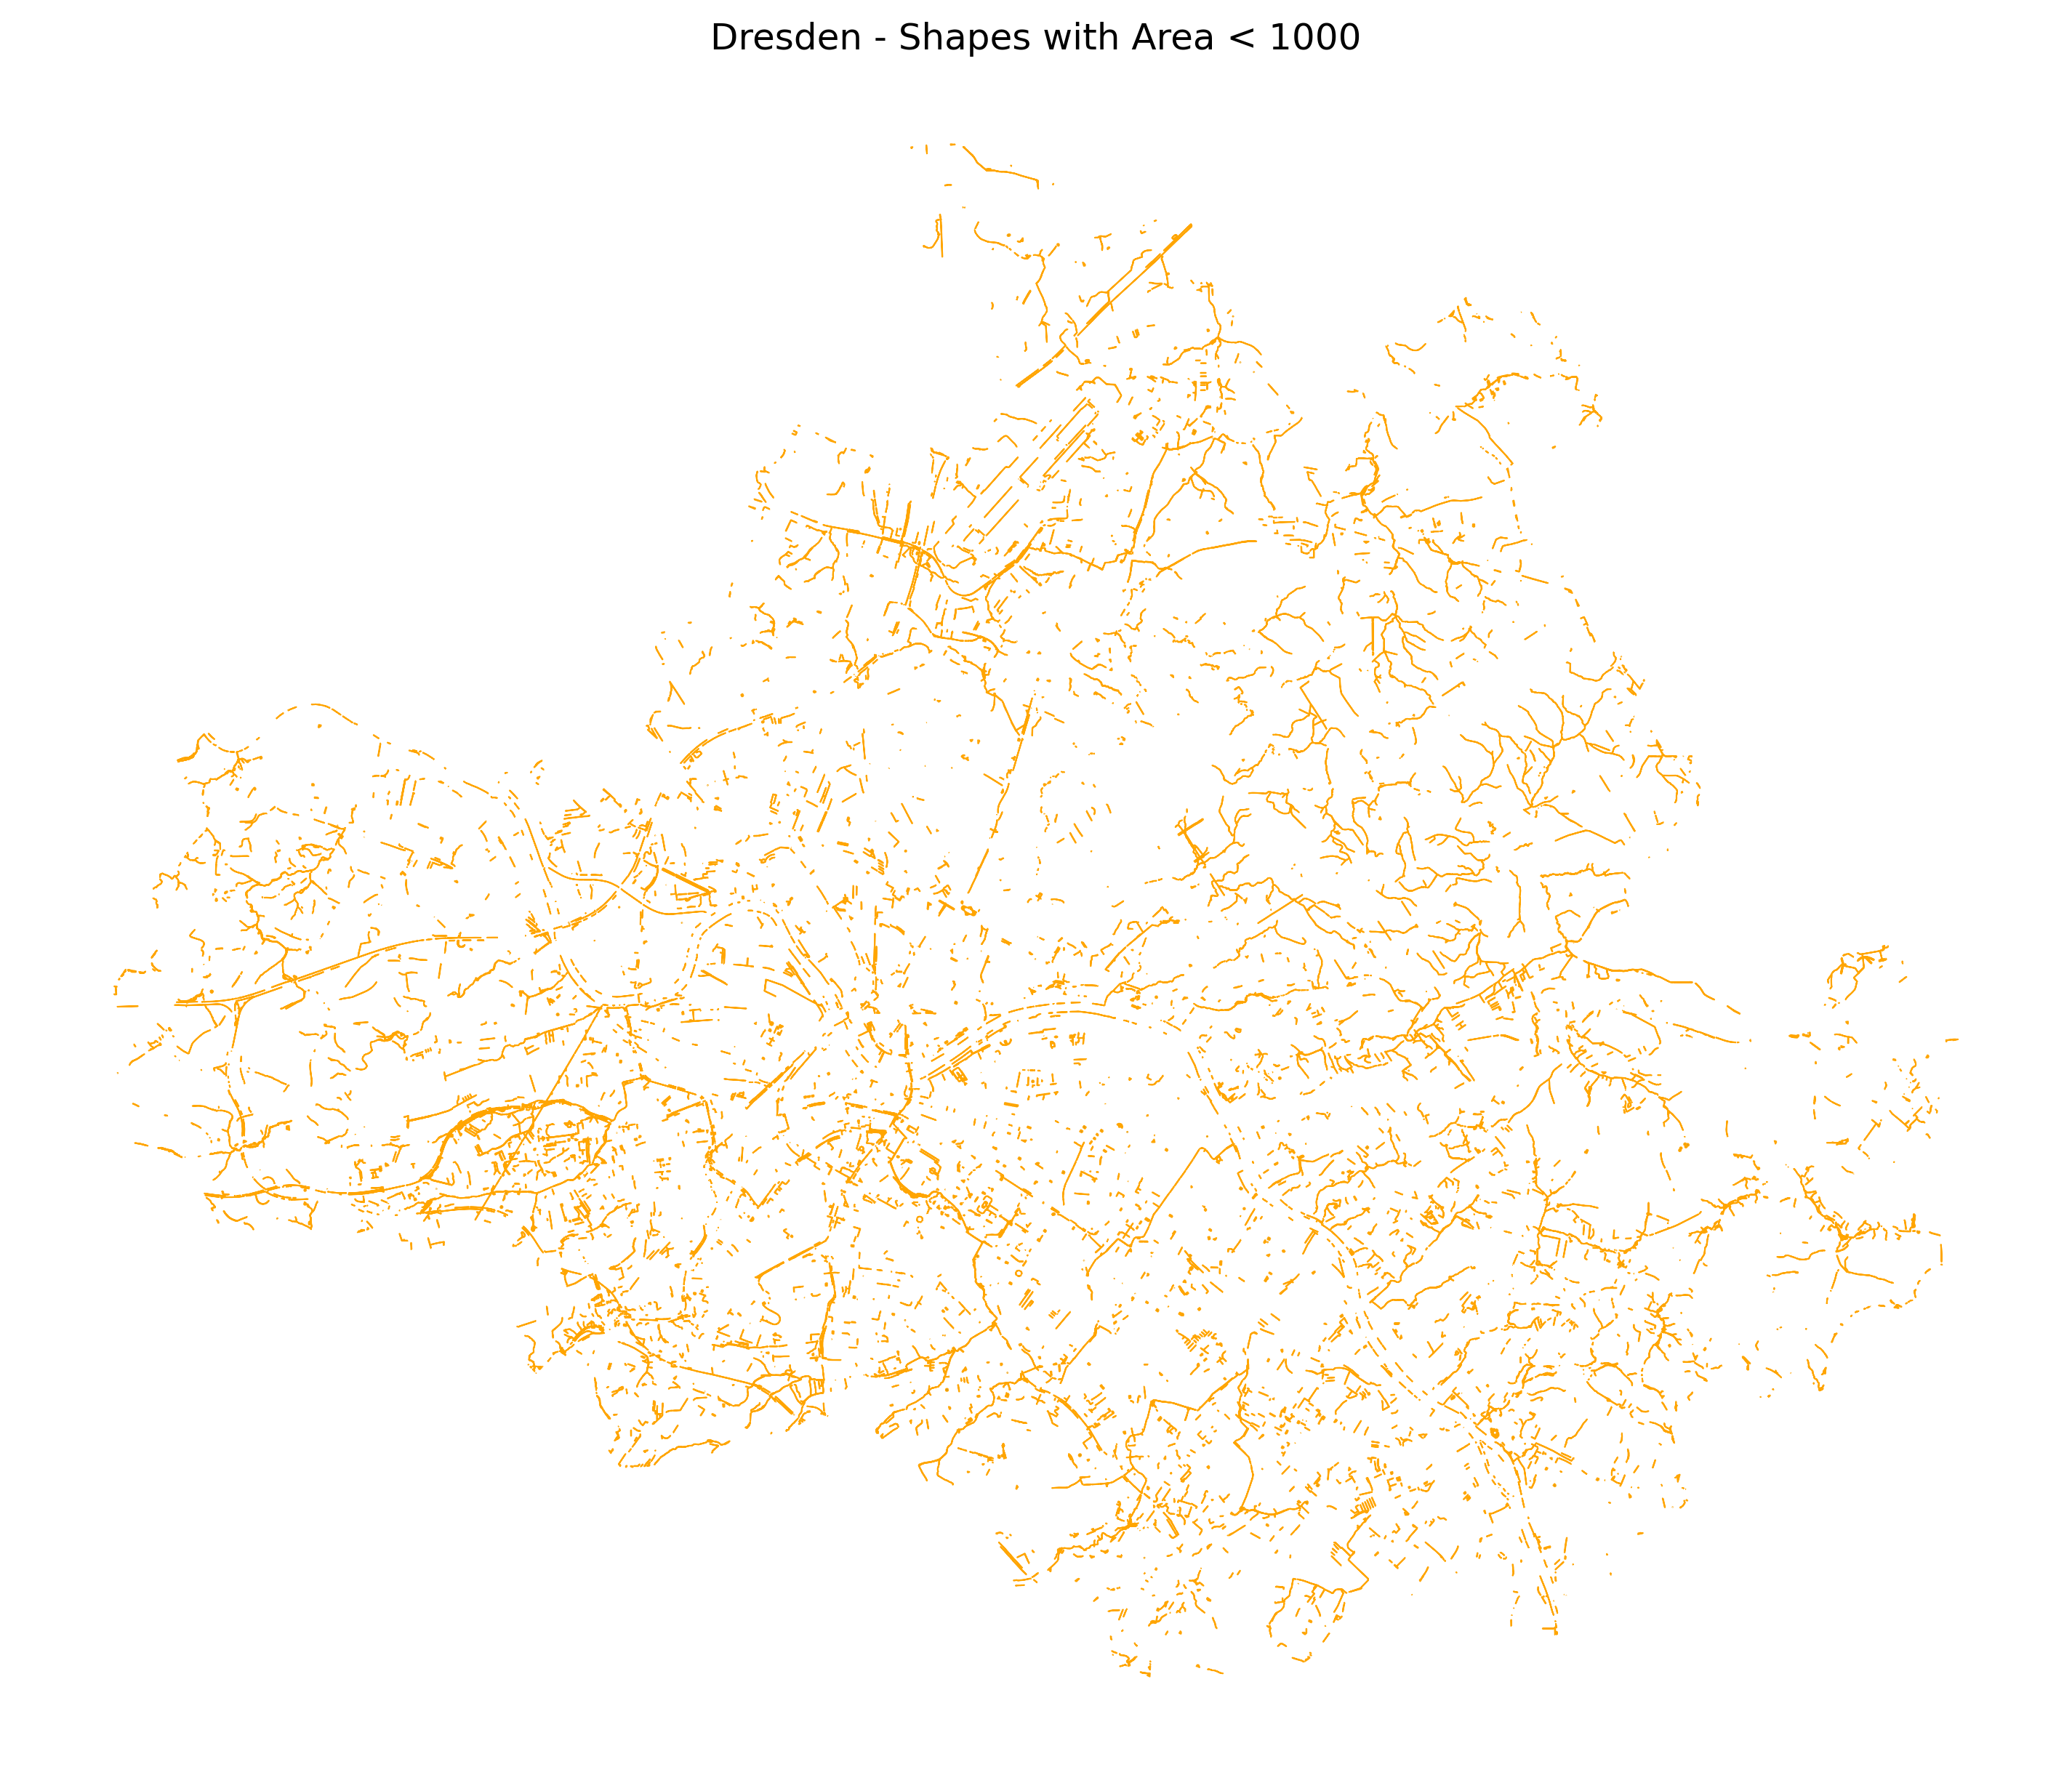

In [7]:
fig, ax = plt.subplots(
    nrows=1, ncols=1, figsize=(12, 18), dpi=300)
ax = filter_db.plot(ax=ax, linewidth=0.5, edgecolor='orange')
ax.set_title("Dresden - Shapes with Area < 1000")
ax.set_axis_off()

To show a specific rows of the dataset, the `loc` method is used to select the rows based on their index.

`````{admonition} loc vs iloc!
:class: danger, dropdown

- If rows are selected using their index labels, `loc` is used.
- If rows are selected based on their numerical position, `iloc` is used.

**Example:**

- **Dataset**

| index  |    Name     |   Age  |
| :------| ----------- |------: |
|    A   |   user1     |    15  |
|    B   |   user2     |    16  |
|    C   |   user3     |    30  |



- **Using loc**

output_1= Dataset.loc['B']


| index  |    Name     |   Age  |
| :------| ----------- |------: |
|    B   |   user2     |    16  |



- **Using iloc**

output_2= Dataset.iloc[1]

**Indexing starts at 0**


| index  |    Name     |   Age  |
| :------| ----------- |------: |
|    B   |   user2     |    16  |

`````

Extract one row from dataset:

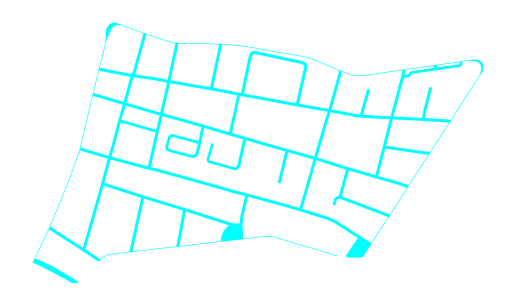

In [8]:
gdf_rows = gdf.loc[[100]] 
ax=gdf_rows.plot(color='cyan')
ax.set_axis_off()

Extract a list of rows from dataset:

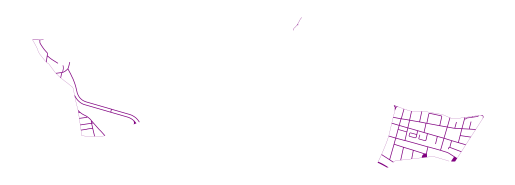

In [9]:
gdf_rows = gdf.loc[[100,101,123,148]] 
ax=gdf_rows.plot(color='purple')
ax.set_axis_off()

Extract a range of rows from dataset:

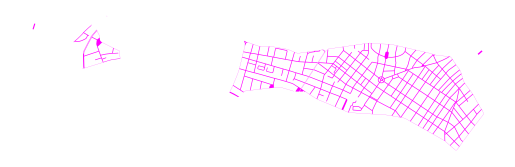

In [10]:
gdf_rows = gdf.loc[100:111]
ax=gdf_rows.plot(color='magenta')
ax.set_axis_off()

## Plot Features Within Bounding Box

The bounding box values can be defined manually or extracted from a specific subset of rows in the dataset.

The bounding box is extracted using the `total_bounds` for the required features, providing four values: 
- `Minimum longitude` representing the left boundary
- `Minimum latitude` representing the lower boundary
- `Maximum longitude` representing the right boundary
- `Maximum latitude` representing the upper boundary

In the following example, the bounding box for the features in rows 100 to 110 is extracted and stored in separate variables.

In [11]:
lonmin, latmin, lonmax, latmax = gdf[100:110].total_bounds
print(lonmin, latmin, lonmax, latmax)

409469.5248999996 5654741.2675 416922.3970999997 5656956.8463


Then, the geometries that **completely** fall within the generated bounding box are filtered.

`````{admonition} geometry.bounds.XXXX!
:class: attention, dropdown
- `gdf.geometry.bounds.minx >= lonmin`:

Selects features whose left boundary (minx) is greater than or equal to the bounding box's left boundary (lonmin)

- `gdf.geometry.bounds.maxx <= lonmax`:

Selects features whose right boundary (maxx) is less than or equal to the bounding box's right boundary (lonmax)

- `gdf.geometry.bounds.miny >= latmin`:

Selects features whose bottom boundary (miny) is greater than or equal to the bounding box's bottom boundary (latmin)

- `gdf.geometry.bounds.maxy <= latmax`:

Selects features whose top boundary (maxy) is less than or equal to the bounding box's top boundary (latmax)
`````

In [12]:
gdf_filtered = gdf[
    (gdf.geometry.bounds.minx >= lonmin) & 
    (gdf.geometry.bounds.maxx <= lonmax) & 
    (gdf.geometry.bounds.miny >= latmin) & 
    (gdf.geometry.bounds.maxy <= latmax)]

Finally plotted:

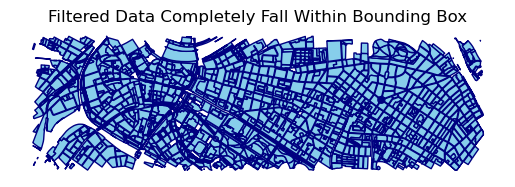

In [13]:
ax = gdf_filtered.plot(color='skyblue',edgecolor='navy')
ax.set_title("Filtered Data Completely Fall Within Bounding Box")
ax.set_axis_off()

`````{admonition} Plot features within bounding box using Clipping function
:class: tip
There is another possibility of showing the features in bounding box using clipping function which is explained in the [Clipping Chapter](https://stag.training.fdz.ioer.info/notebooks/307_spatial_clipping.html#clipping-based-on-the-bounding-box). 
`````

To enhance the plot, you can customize the styling. 
- `column` shows the column that is mapped to color.
- `cmap` defines the [color map](https://matplotlib.org/stable/gallery/color/colormap_reference.html#reverse-cmap).
- `legend`= True, adds the legend.
- `legend_kwds` adds the legend label and defines the orientation.

- **Example of String values:**

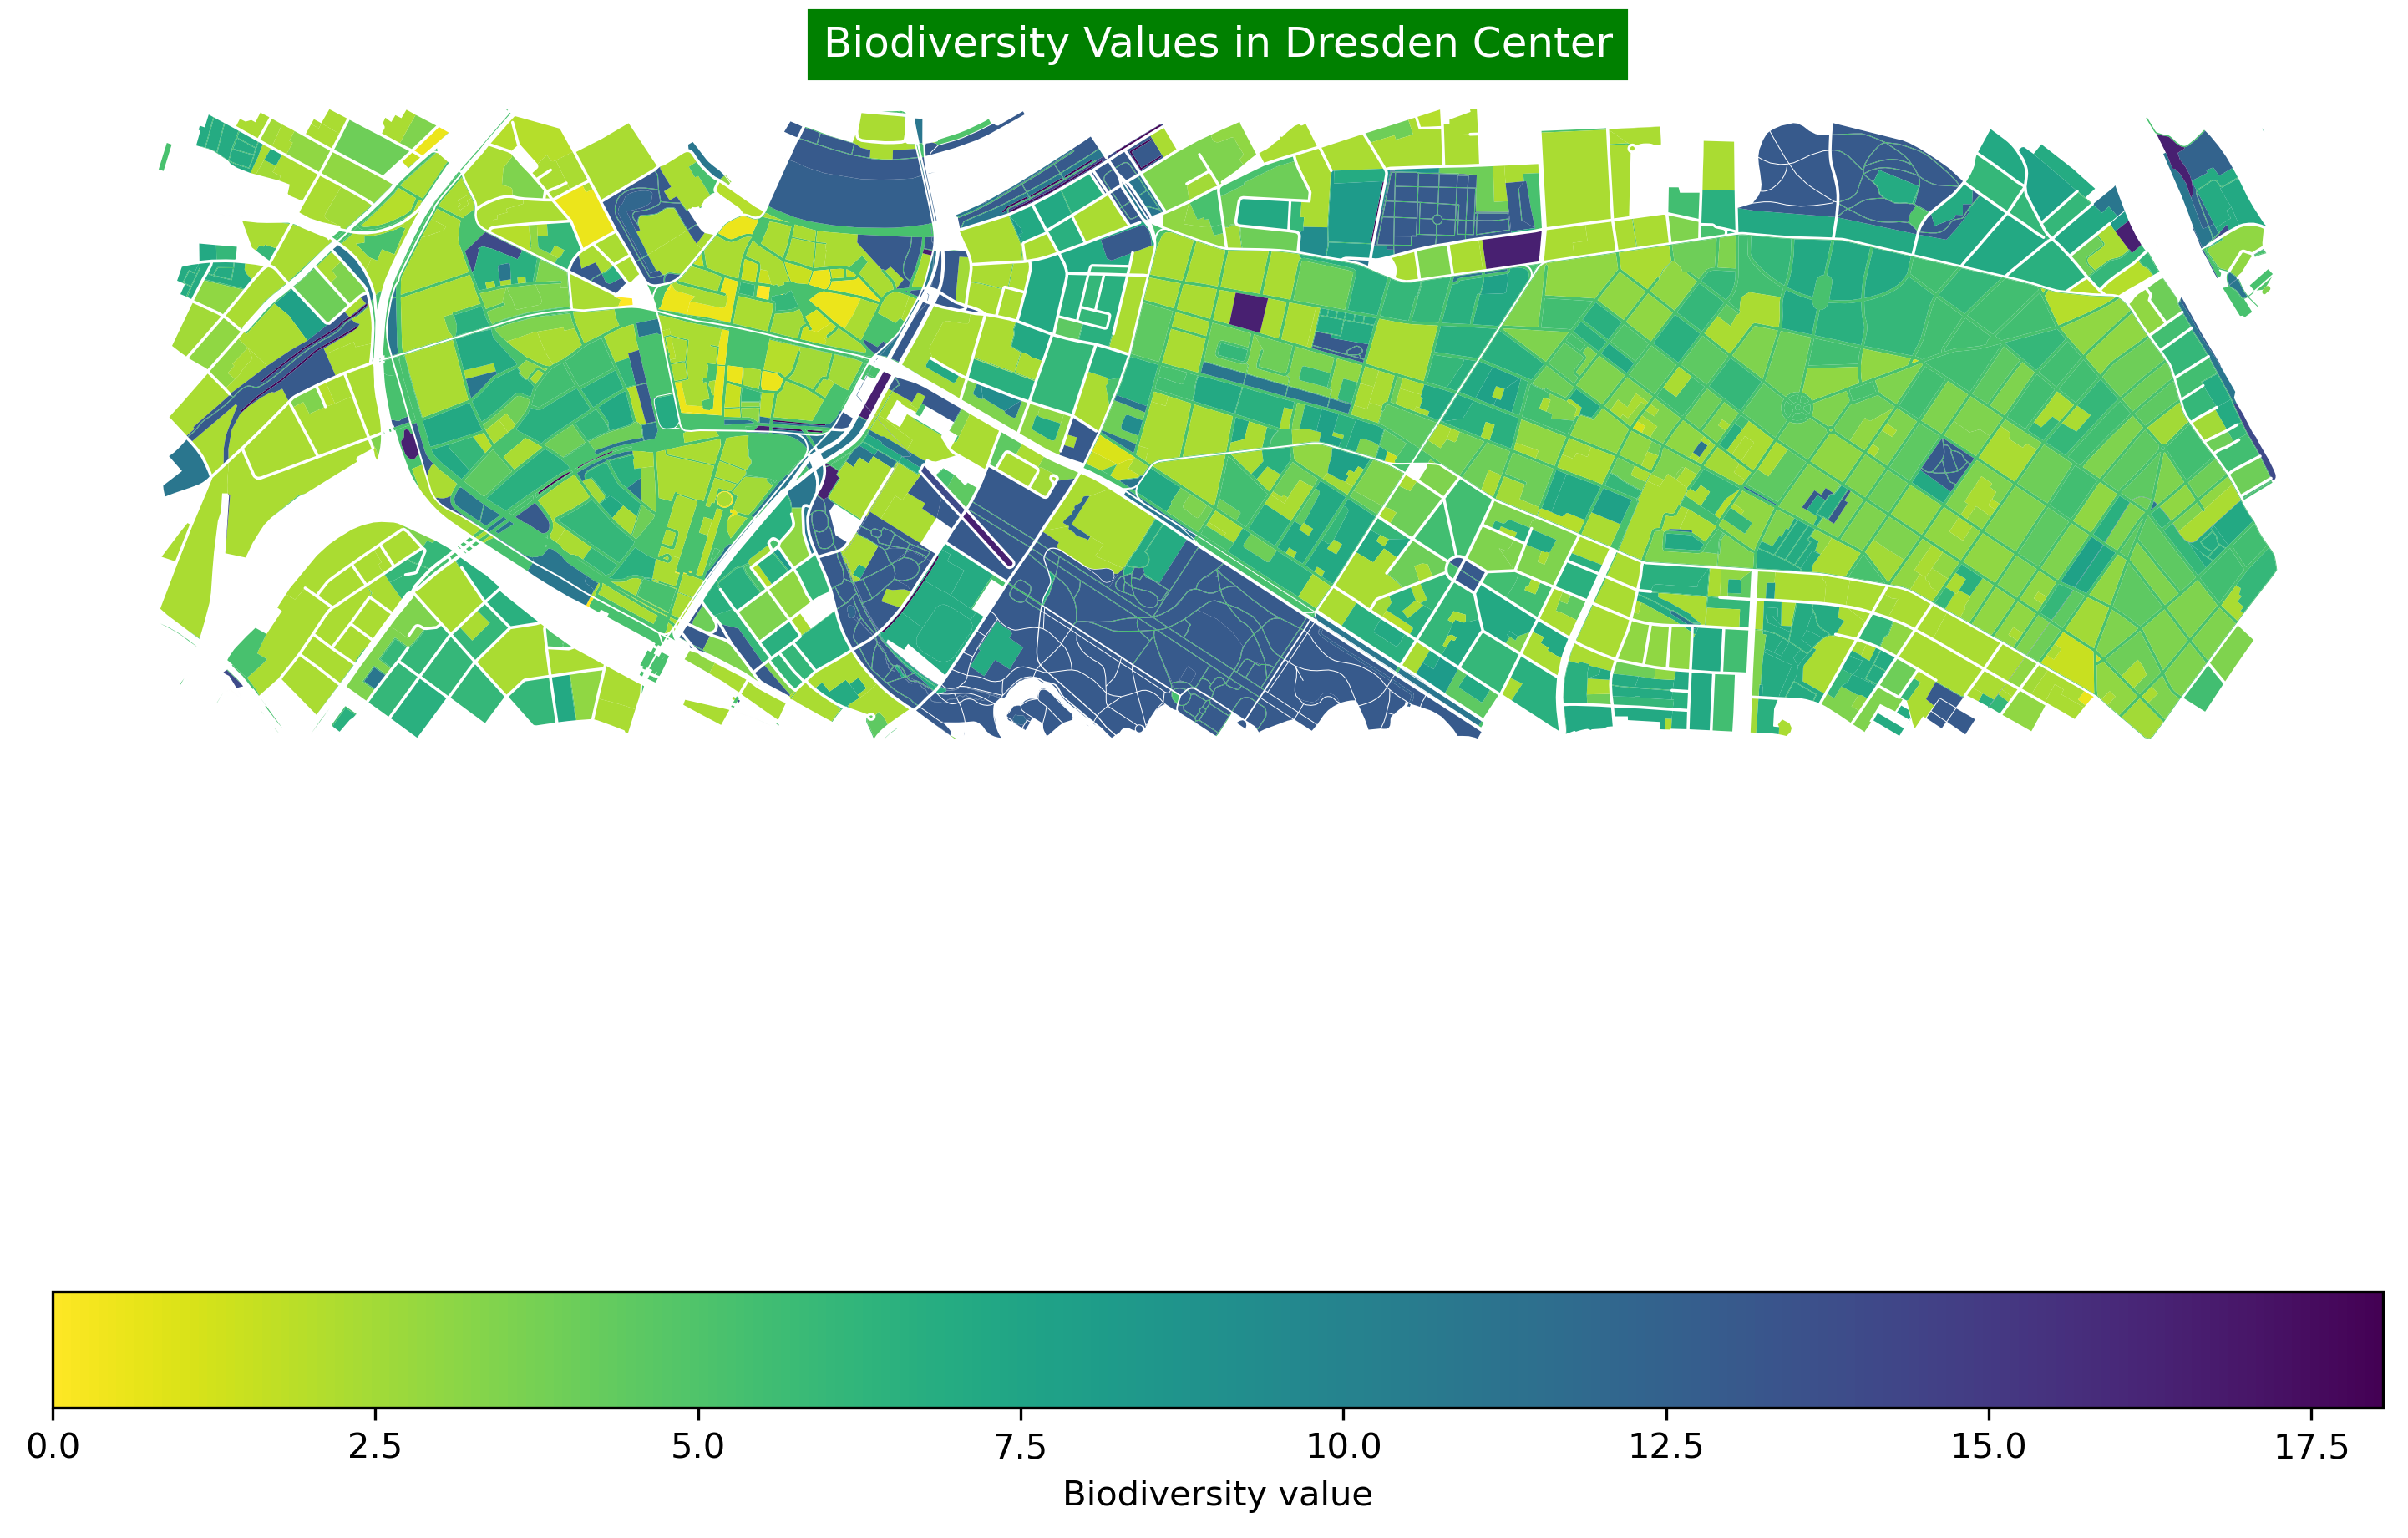

In [14]:
fig, ax = plt.subplots(
    nrows=1, ncols=1, figsize=(12, 18), dpi=300)

ax = gdf_filtered.plot(
    ax=ax,
    column='Biotpkt2018', 
    cmap='viridis_r',
    legend=True,
    legend_kwds={"label": "Biodiversity value", "orientation": "horizontal"})

ax.set_title('Biodiversity Values in Dresden Center',
             backgroundcolor='green', 
             color='white')
ax.set_axis_off()

- **Example of Numeric values:**

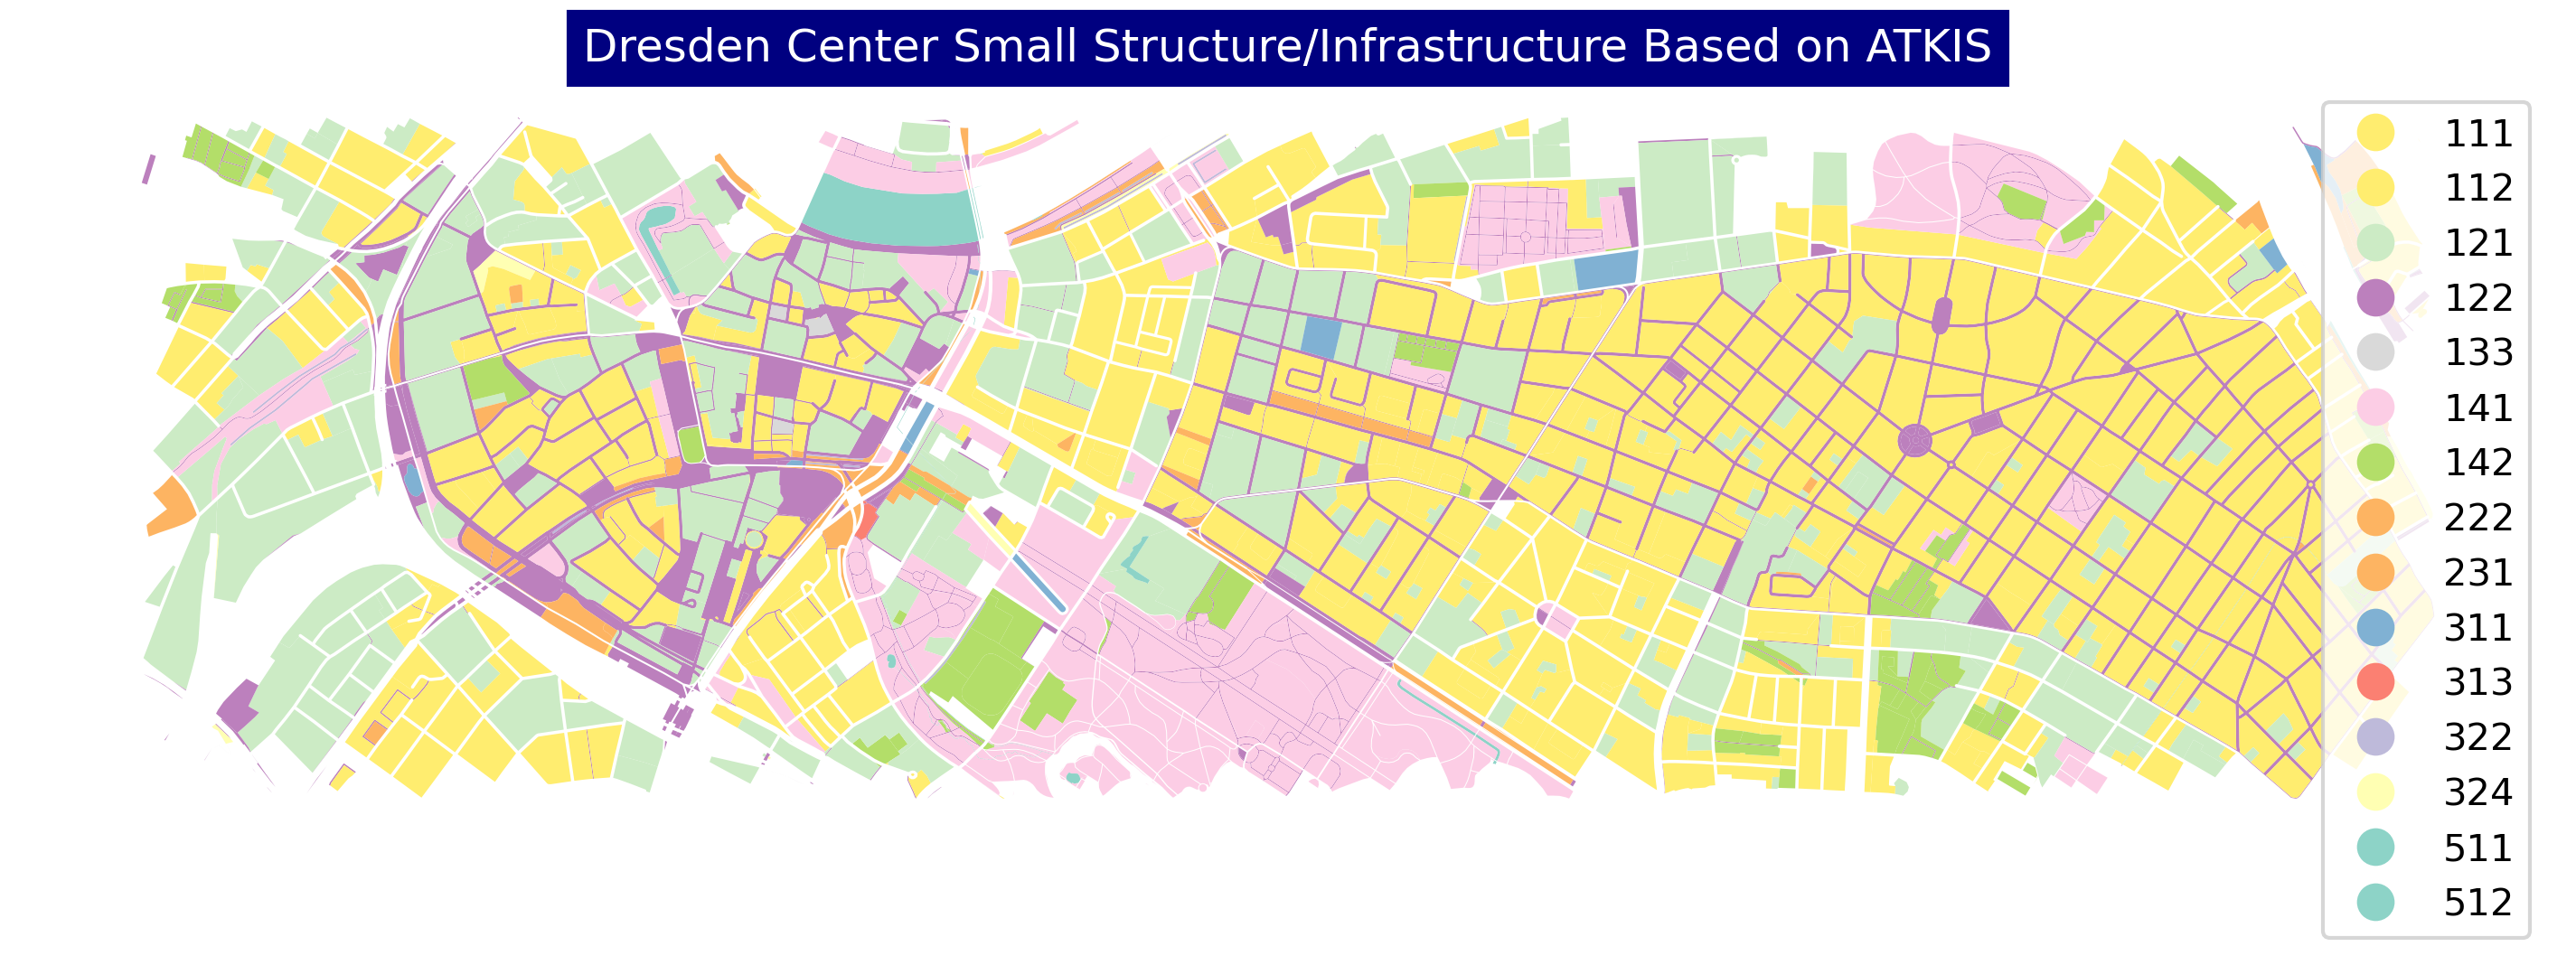

In [41]:
fig, ax = plt.subplots(
    nrows=1, ncols=1, figsize=(12, 18), dpi=300)

ax = gdf_filtered.plot(
    ax=ax,
    column='CLC_st1', 
    cmap='Set3_r',
    legend=True)

ax.set_title('Dresden Center Small Structure/Infrastructure Based on ATKIS',
             backgroundcolor='navy',
             color='white')
ax.set_axis_off()

## Filtering Features Using a Slider

It is also possible to use a widget to interactively visualize the desired part of the data.

For this purpose, the [package ipywidgets](https://ipywidgets.readthedocs.io/en/stable/) and the function `interact` from that library are imported.

In [18]:
import ipywidgets as widgets
from ipywidgets import interact

Then, a function is defined using def to display the features within the desired range.

The interactive part uses a slider to visualize different sections within the desired range.

- The `interact` function creates the slider by linking it to the user-defined function ShapeArea.
- ShapeArea is the defined `function name`.
- The values are defined between the `min` and `max` required areas with an interval (`step`) of 0.1. 

In the second line, the maximum value is set to 10000 to limit the data, and by moving the slider, the range of visualization changes accordingly.

In [ ]:
def ShapeArea(value):
    filtered_gdf = gdf[gdf['Shape_Area'] <= value]
    ax= filtered_gdf.plot()
    ax.set_axis_off()
    plt.show()  

interact(ShapeArea, value=widgets.FloatSlider(min=20000, max=70000, step=0.1));

<video autoplay loop muted no-controls style="border: 5px solid black; border-radius: 10px;">
  <source src="../_static/videos/Video3.webm" type="video/webm" />
  Your browser does not support the video tag.
</video>
<figcaption>Interactive Plot</figcaption>


## Adding Basemap to the Plot

The [folium library](https://realpython.com/python-folium-web-maps-from-data/) could be used to create an interactive map from the data.

In [20]:
import folium

The first step is to create a base map using the `map` function. In order to focus the map on the area of interest and also to define the level of detail that is of interest, the area center is defined as `location` and the zoom level as `zoom-start`.

In [21]:
basemap = folium.Map(location=[51.04723, 13.76009], zoom_start=13)

`````{admonition} How to find coordinates and zoom levels
:class: note
- **NOTE:** The easiest way to find the center coordinates and desired zoom level is to use online maps like [MapTiler](https://www.maptiler.com/maps/#style=streets-v2&lang=auto&mode=2d&position=14.48/51.0496/13.738) and [OpenStreeMap](https://www.openstreetmap.org/#map=13/51.04679/13.73111). Zoom in and out to find the optimal area and detail level, then check the URL for the information.
- **Example:** In the URL `14.48/51.0496/13.738`, 14.48 is the zoom level, 51.0496 is the latitude and 13.738 is the longitude.

```{figure} ../resources/11.png
:width: 700px 
:name: figure-example

Set coordinates and zoom levels using URL in MapTiler
`````

The data should now be added to the basemap. 

In [ ]:
folium.GeoJson(gdf_filtered).add_to(basemap)

The map is displayed by calling the base map name.

In [23]:
basemap